# **Airbnb Listings**

**Group 7**

* Asra Ashmed
* Jenil Shah
* Sneha Jayapradeep
* Chirayu (Mitthi) Jain

In [1]:
pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=7a3f8614addcf33ea86dbf8b5a1d9a85ea5d27b19523367fe99a9bdbedb39b82
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


## Importing Libraries

In [2]:
from google.colab import drive

import ipywidgets as widgets
from IPython.display import display
import geohash2 as gh
from scipy.stats import randint, loguniform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from sklearn.experimental import enable_halving_search_cv
from sklearn import set_config
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from scipy.stats import uniform, randint
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

## Mounting the Drive and Loading the Dataset

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppressing scientific notation
#listings = pd.read_csv('/content/gdrive/MyDrive/BA-810-Project/listings.csv')
listings=pd.read_csv('/content/listings.csv')

## Exploring the Dataset (can add more to this once our models are finalized)

In [4]:
listings.head()

index     id                                               name  host_id  \
0      0  13913                Holiday London DB Room Let-on going    54730   
1      1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2      2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3      3  24328  Battersea bedroom & office w parking shared ga...    41759   
4      4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

  host_name  neighbourhood_group           neighbourhood  latitude  longitude  \
0     Alina                  NaN               Islington  51.56802   -0.11121   
1  Philippa                  NaN  Kensington and Chelsea  51.48796   -0.16898   
2       Liz                  NaN             Westminster  51.52098   -0.14002   
3       Joe                  NaN              Wandsworth  51.47298   -0.16376   
4    Amanda                  NaN              Wandsworth  51.44687   -0.21874   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     65               1                 16  2019-06-10   
1  Entire home/apt    100               3                 85  2019-05-05   
2  Entire home/apt    300               3                 41  2019-06-19   
3  Entire home/apt    175              30                 93  2019-06-08   
4  Entire home/apt     65               4                 28  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0            0.15000                               3               347  
1            0.73000                               1               203  
2            0.41000                              14               269  
3            0.88000                               1               329  
4            0.69000                               1                 2

In [5]:
listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           83850 non-null  int64  
 1   id                              83850 non-null  int64  
 2   name                            83824 non-null  object 
 3   host_id                         83850 non-null  int64  
 4   host_name                       83803 non-null  object 
 5   neighbourhood_group             0 non-null      float64
 6   neighbourhood                   83850 non-null  object 
 7   latitude                        83850 non-null  float64
 8   longitude                       83850 non-null  float64
 9   room_type                       83850 non-null  object 
 10  price                           83850 non-null  int64  
 11  minimum_nights                  83850 non-null  int64  
 12  number_of_reviews               

In [7]:
listings.describe()

index             id         host_id  neighbourhood_group  \
count 83850.00000    83850.00000     83850.00000              0.00000   
mean  41924.50000 21348195.55924  78228741.86875                  NaN   
std   24205.55437 10283563.80740  78234945.98052                  NaN   
min       0.00000    13913.00000      2010.00000                  NaN   
25%   20962.25000 13649324.25000  14517363.00000                  NaN   
50%   41924.50000 22009272.50000  44512477.00000                  NaN   
75%   62886.75000 30315537.75000 132581311.00000                  NaN   
max   83849.00000 36585818.00000 274979066.00000                  NaN   

         latitude   longitude       price  minimum_nights  number_of_reviews  \
count 83850.00000 83850.00000 83850.00000     83850.00000        83850.00000   
mean     51.50950    -0.12839   121.65630         4.20196           16.48432   
std       0.04624     0.09223   224.90015        16.07044           34.89266   
min      51.29272    -0.50130     0.00000         1.00000            0.00000   
25%      51.48524    -0.18839    45.00000         1.00000            0.00000   
50%      51.51397    -0.12581    81.00000         2.00000            4.00000   
75%      51.53740    -0.07037   140.00000         3.00000           17.00000   
max      51.68657     0.29657 13700.00000      1125.00000          665.00000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        62827.00000                     83850.00000       83850.00000  
mean             1.20837                        25.59950         116.32784  
std              1.41684                       137.24055         132.40335  
min              0.00000                         1.00000           0.00000  
25%              0.24000                         1.00000           0.00000  
50%              0.74000                         1.00000          55.00000  
75%              1.64000                         4.00000         229.00000  
max             30.93000                      1161.00000         365.00000

The mean of the listing prices per night is: 121.65630292188432
The median of the listing prices per night is: 81.0


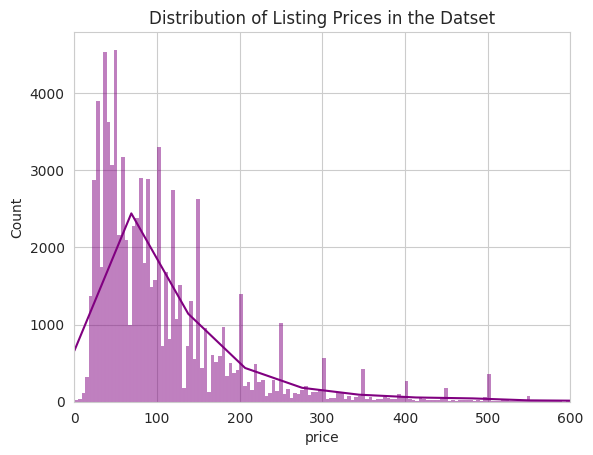

In [5]:
sns.set_style('whitegrid')
sns.histplot(data=listings, x='price', kde=True, color = 'purple')
plt.xlim(0,600)
plt.title("Distribution of Listing Prices in the Datset")
print("The mean of the listing prices per night is:", listings['price'].mean())
print("The median of the listing prices per night is:", listings['price'].median())

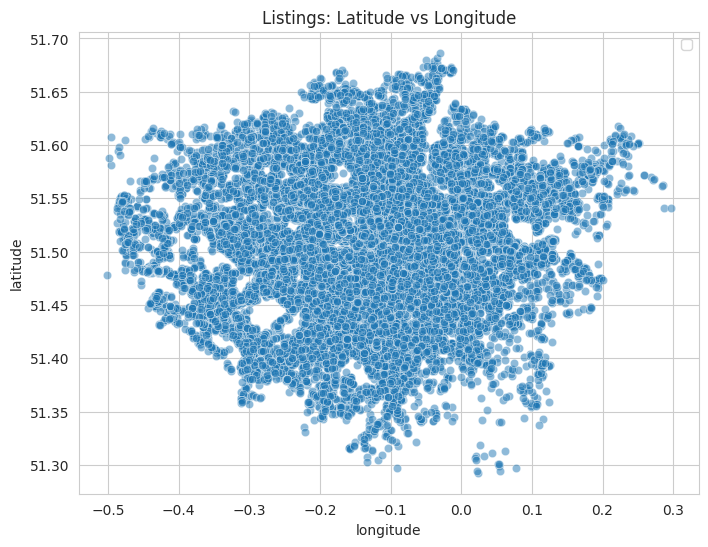

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=listings, x='longitude', y='latitude', sizes=(1, 100), alpha=0.5)
plt.title('Listings: Latitude vs Longitude')
plt.legend(scatterpoints=1)
plt.show()

The graph below shows the average price per night for each neighborhood in London. Westminster, Kensington and Chelsea, and City of London are the three most priciest neighborhoods.

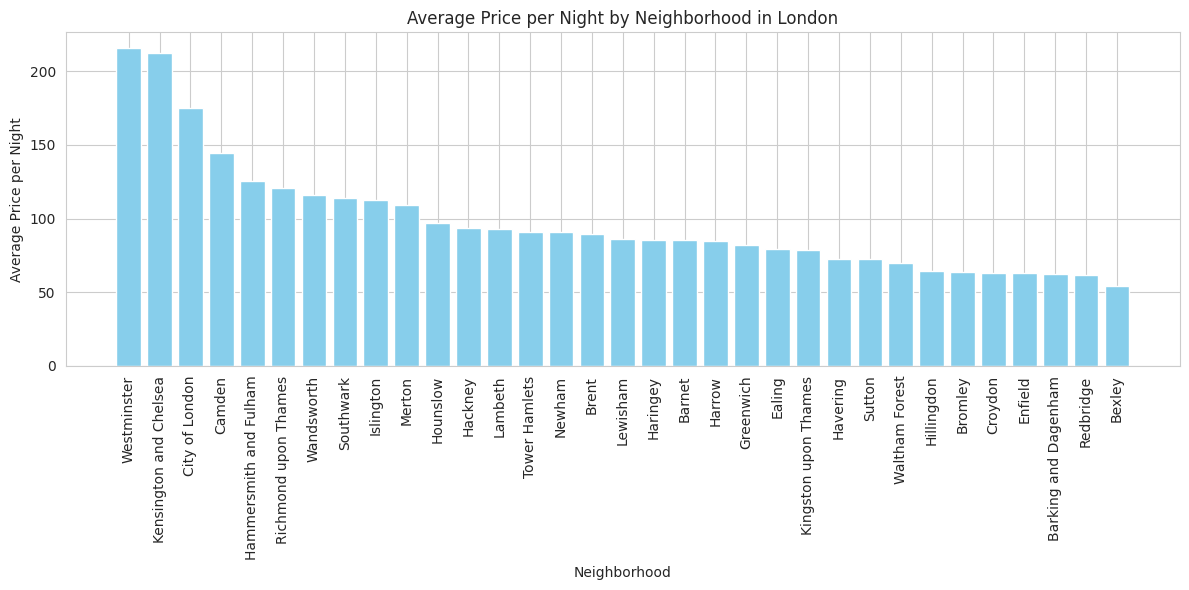

In [7]:
neighborhood_avg_price = listings.groupby('neighbourhood')['price'].mean().reset_index()
neighborhood_avg_price = neighborhood_avg_price.sort_values('price', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_avg_price['neighbourhood'], neighborhood_avg_price['price'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night by Neighborhood in London')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph below shows the number of listings by Neighborhood. The most popular neighborhoods are Westminster, Tower of Hamlets, and Hackney.

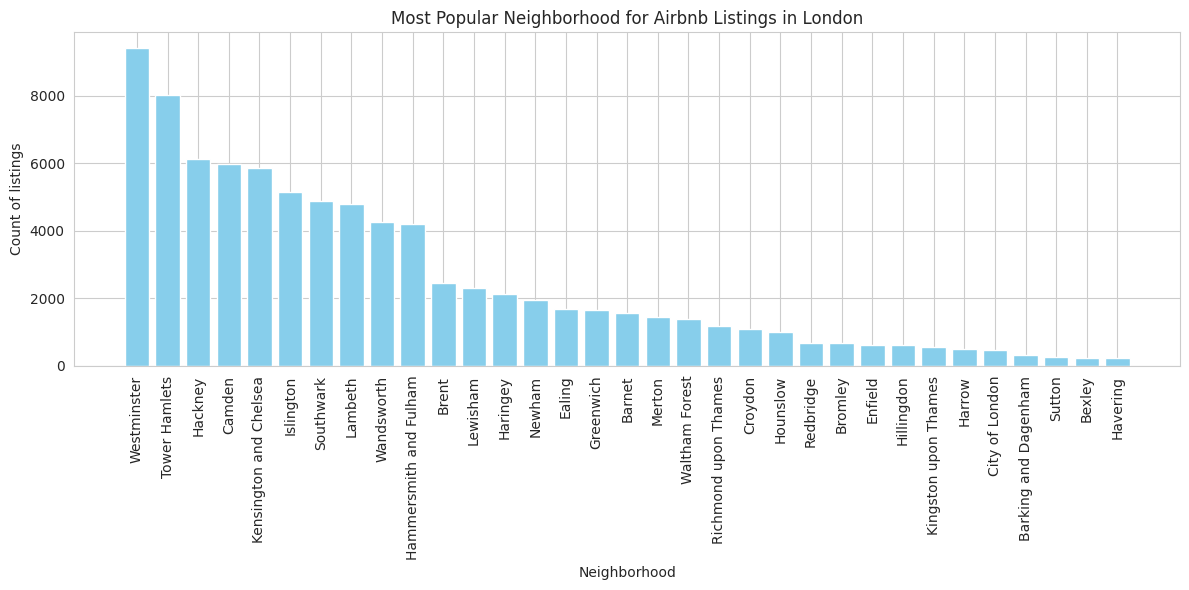

In [8]:
popular_neighborhood = listings.groupby('neighbourhood')['price'].count().reset_index()
popular_neighborhood = popular_neighborhood.sort_values('price', ascending=False)
popular_neighborhood.head()
plt.figure(figsize=(12, 6))
plt.bar(popular_neighborhood['neighbourhood'], popular_neighborhood['price'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Count of listings')
plt.title('Most Popular Neighborhood for Airbnb Listings in London')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The map below shows us the density of listings in all of London.

In [9]:
fig = px.density_mapbox(listings,
                        lat='latitude',
                        lon='longitude',
                        radius=10,  # Adjust the radius for point density
                        center=dict(lat=51.5074, lon=-0.1278),  # Center the map around London
                        zoom=10,  # Adjust the initial zoom level
                        width=1000,
                        height=900,
                        mapbox_style="carto-positron",  # You can choose different mapbox styles
                        range_color=[0,10],
                        title='Density Map of Airbnb Listings in London'
                       )
fig.show()

The graph below shows the distribution of the room types and the count for each room-type.

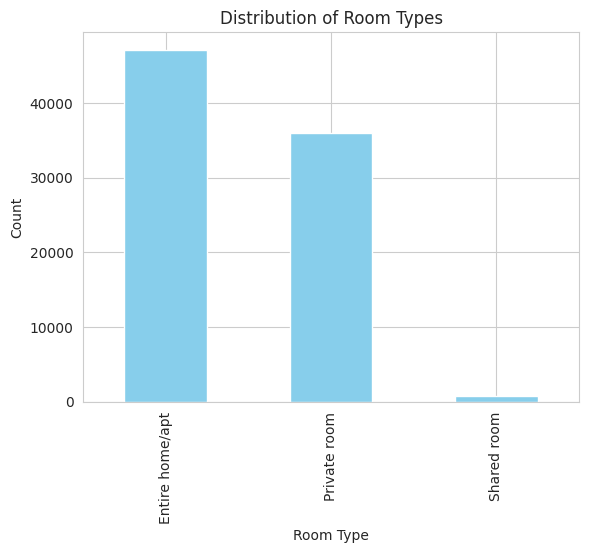

In [10]:
room_types_count = listings['room_type'].value_counts()

# Plotting the bar graph
room_types_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The graph below shows the average price of each of the room-type.

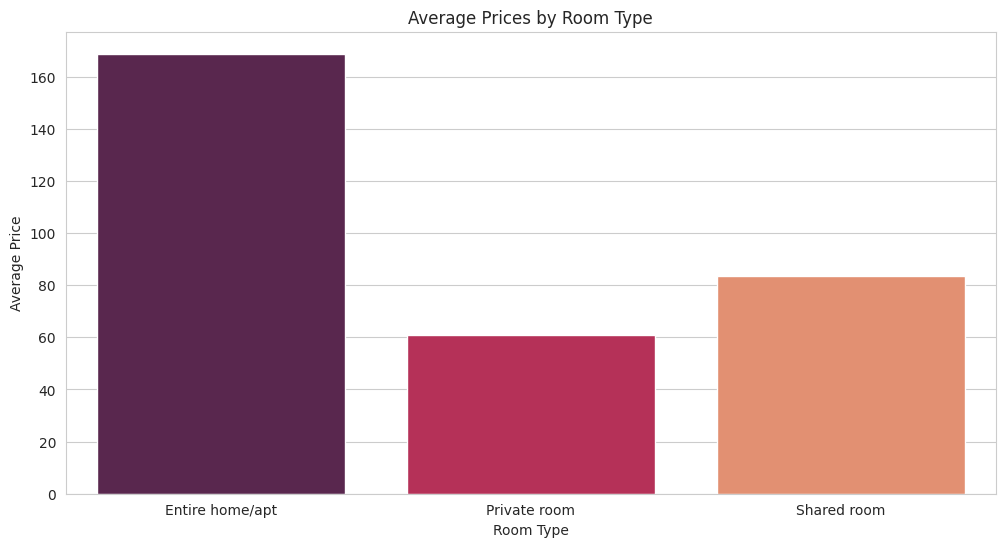

In [11]:
average_prices = listings.groupby('room_type')['price'].mean().reset_index()

# Plotting the bar graph with average prices
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='price', data=average_prices, palette='rocket')
plt.title('Average Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

## Data Cleaning

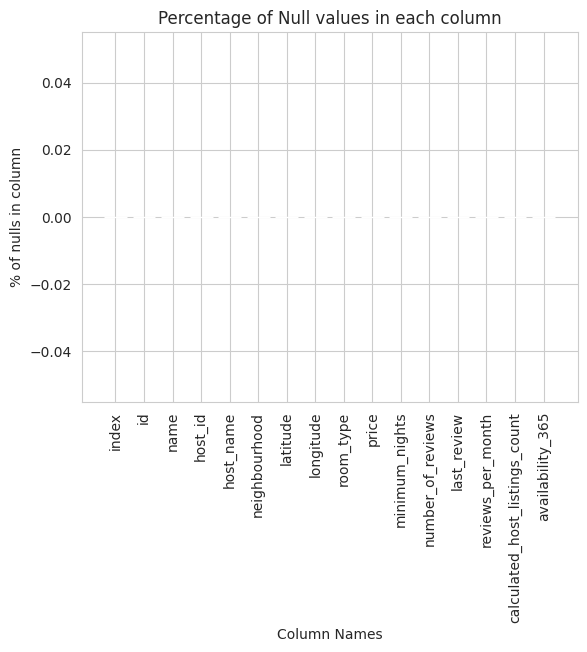

In [26]:
null_percentage =  listings.isna().sum() / listings.shape[0] * 100
fig, ax = plt.subplots()
bars = ax.bar(x = listings.columns, height=round(null_percentage, 2))
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of Null values in each column")
plt.xlabel("Column Names")
plt.ylabel("% of nulls in column")
plt.show()

The following columns appear to have nulls:
1. last_review
2. reviews_per_month
3. neighbourhood_group
4. name
5. host_name

### Dropping neighbourhood_group

We seem to have some null values in certain columns like last_review and reviews_per_month, we believe these to be for the same rows and plan to impute them. The 'neighbourhood_group' column is entirely null and we plan to drop this column because we already have the 'neighbourhood' column.

In [13]:
listings = listings.drop("neighbourhood_group", axis=1)
listings

index        id                                               name  \
0          0     13913                Holiday London DB Room Let-on going   
1          1     15400                Bright Chelsea  Apartment. Chelsea!   
2          2     17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3          3     24328  Battersea bedroom & office w parking shared ga...   
4          4     25023      All-comforts 2-bed flat near Wimbledon tennis   
...      ...       ...                                                ...   
83845  83845  36583878                                7 VH Loft Apartment   
83846  83846  36584535                  Lambs Passage 1 Bedroom Apartment   
83847  83847  36585425               1 Bedroom Apartment in Lambs Passage   
83848  83848  36585645                            Lambs Passage 1 Bedroom   
83849  83849  36585818              1 Bedroom Apartment in Lanterns Court   

        host_id host_name           neighbourhood  latitude  longitude  \
0         54730     Alina               Islington  51.56802   -0.11121   
1         60302  Philippa  Kensington and Chelsea  51.48796   -0.16898   
2         67564       Liz             Westminster  51.52098   -0.14002   
3         41759       Joe              Wandsworth  51.47298   -0.16376   
4        102813    Amanda              Wandsworth  51.44687   -0.21874   
...         ...       ...                     ...       ...        ...   
83845  90770681      Sara             Westminster  51.53057   -0.18423   
83846  47609036       Ben               Islington  51.52301   -0.08979   
83847  47609036       Ben               Islington  51.52301   -0.08979   
83848  47609036       Ben               Islington  51.52301   -0.08979   
83849  47609036       Ben           Tower Hamlets  51.51050   -0.01788   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room     65               1                 16  2019-06-10   
1      Entire home/apt    100               3                 85  2019-05-05   
2      Entire home/apt    300               3                 41  2019-06-19   
3      Entire home/apt    175              30                 93  2019-06-08   
4      Entire home/apt     65               4                 28  2019-06-22   
...                ...    ...             ...                ...         ...   
83845  Entire home/apt    100               2                  0         NaN   
83846  Entire home/apt     82              14                  0         NaN   
83847  Entire home/apt     78              21                  0         NaN   
83848  Entire home/apt     82              21                  0         NaN   
83849  Entire home/apt     72              14                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                0.15000                               3               347  
1                0.73000                               1               203  
2                0.41000                              14               269  
3                0.88000                               1               329  
4                0.69000                               1                 2  
...                  ...                             ...               ...  
83845                NaN                               1               209  
83846                NaN                              18                35  
83847                NaN                              18                36  
83848                NaN                              18                36  
83849                NaN                              18                31  

[83850 rows x 16 columns]

### Converting neighbourhood to a Category

In [15]:
listings['neighbourhood'].nunique()
listings['neighbourhood'] = listings['neighbourhood'].astype('category')

### Converting last_review to datetime

In [16]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
most_recent_date = listings['last_review'].max()
print(most_recent_date)
oldest_date = listings['last_review'].min()
print(oldest_date)

2019-07-11 00:00:00
2011-07-02 00:00:00


### Imputing values into last_review

We will impute the date of 'last_review' as an early date - we will do so by finding the earliest date in the column and then make the null values a date significantly before the earliest date.

In [18]:
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')
listings['last_review'].min()

Timestamp('2010-01-01 00:00:00')

We can see that the earliest date is 2011-07-02 00:00:00, and we can pick a date that is significantly before that - 2010-01-01 00:00:00 - so that wew ill know that all listings with this date were actually those listings that did not have a date mentioned.

In [19]:
listings['last_review'] = listings['last_review'].fillna(pd.to_datetime('2010-01-01 00:00:00'))

### Imputing vales into reviews_per_month

In [20]:
# Replacing missing values in 'reviews_per_month' with the calculated median
median_reviews_per_month = listings['reviews_per_month'].median()
listings['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

After this, we still have some nulls in the "name" and "host_name" columns, which we can just impute with "Unknown."

In [21]:
listings['name'] = listings['name'].fillna('Unknown')
listings['host_name'] = listings['host_name'].fillna('Unknown')

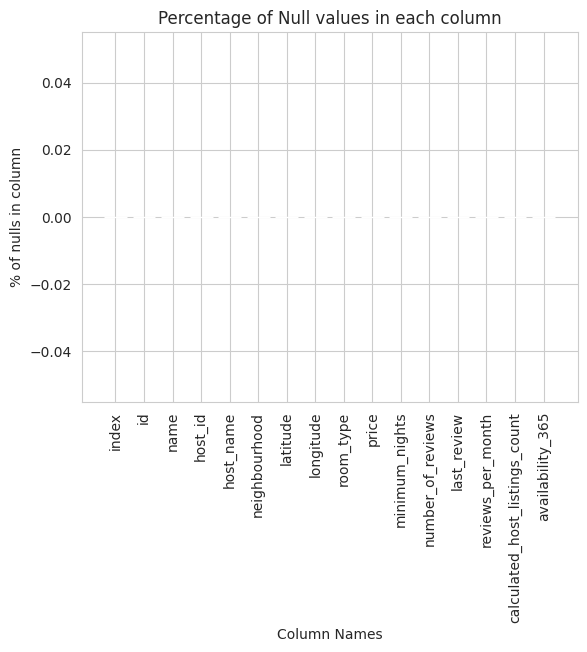

In [22]:
null_percentage =  listings.isna().sum() / listings.shape[0] * 100
fig, ax = plt.subplots()
bars = ax.bar(x = listings.columns, height=round(null_percentage, 2))
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of Null values in each column")
plt.xlabel("Column Names")
plt.ylabel("% of nulls in column")
plt.show()

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           83850 non-null  int64         
 1   id                              83850 non-null  int64         
 2   name                            83850 non-null  object        
 3   host_id                         83850 non-null  int64         
 4   host_name                       83850 non-null  object        
 5   neighbourhood                   83850 non-null  category      
 6   latitude                        83850 non-null  float64       
 7   longitude                       83850 non-null  float64       
 8   room_type                       83850 non-null  object        
 9   price                           83850 non-null  int64         
 10  minimum_nights                  83850 non-null  int64         
 11  nu

In [24]:
listings.head()

index     id                                               name  host_id  \
0      0  13913                Holiday London DB Room Let-on going    54730   
1      1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2      2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3      3  24328  Battersea bedroom & office w parking shared ga...    41759   
4      4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

  host_name           neighbourhood  latitude  longitude        room_type  \
0     Alina               Islington  51.56802   -0.11121     Private room   
1  Philippa  Kensington and Chelsea  51.48796   -0.16898  Entire home/apt   
2       Liz             Westminster  51.52098   -0.14002  Entire home/apt   
3       Joe              Wandsworth  51.47298   -0.16376  Entire home/apt   
4    Amanda              Wandsworth  51.44687   -0.21874  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     65               1                 16  2019-06-10            0.15000   
1    100               3                 85  2019-05-05            0.73000   
2    300               3                 41  2019-06-19            0.41000   
3    175              30                 93  2019-06-08            0.88000   
4     65               4                 28  2019-06-22            0.69000   

   calculated_host_listings_count  availability_365  
0                               3               347  
1                               1               203  
2                              14               269  
3                               1               329  
4                               1                 2

## EDA to Understand Features for Model

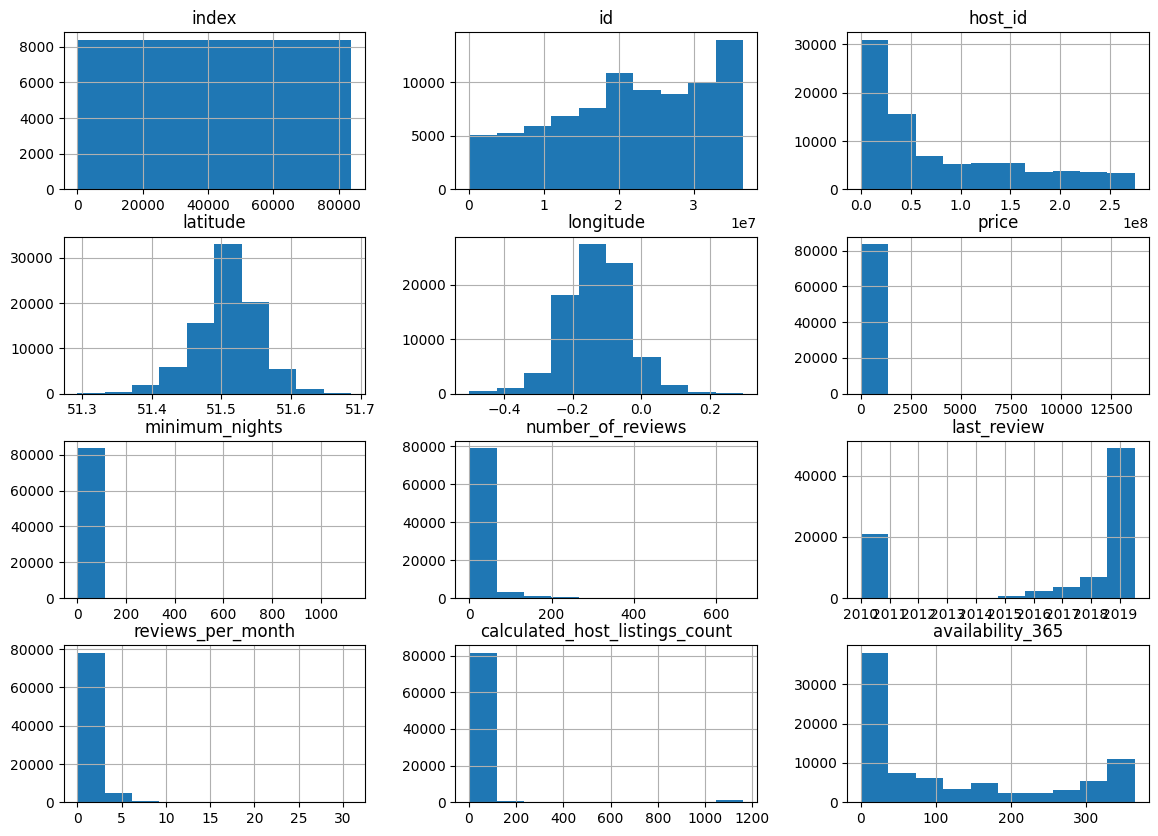

In [ ]:
listings.hist(bins=10, figsize=(14, 10))
plt.show()

### Visualizing Outliers

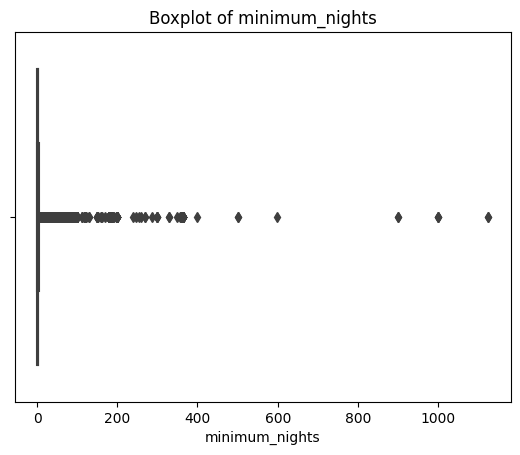

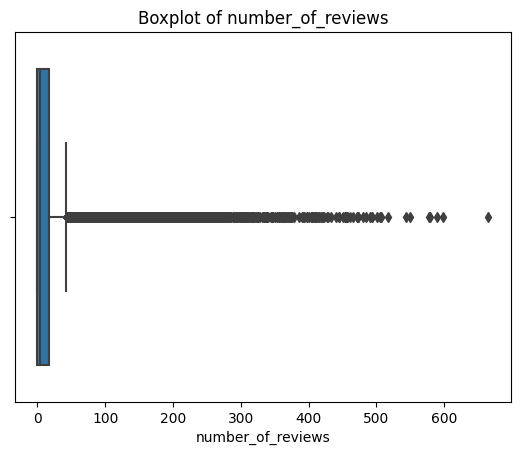

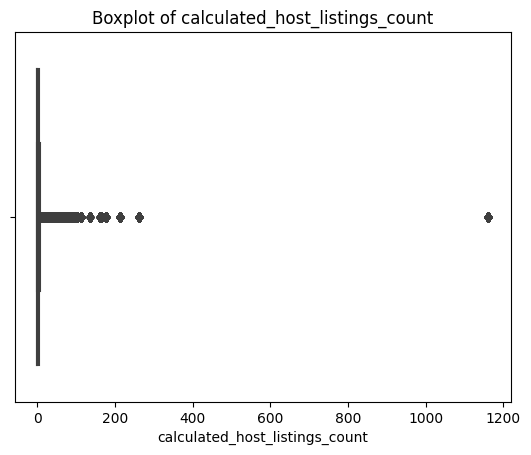

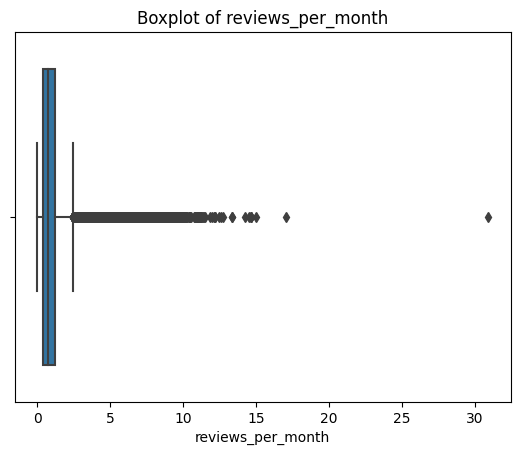

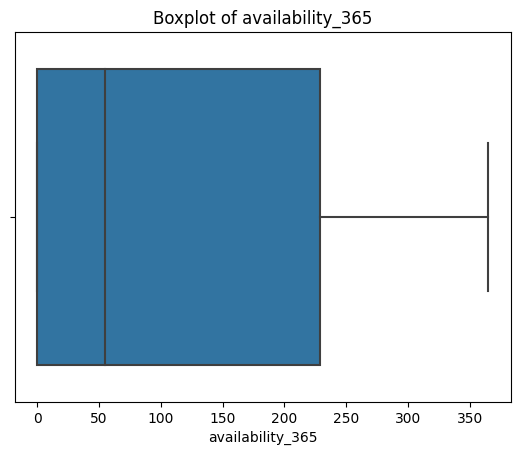

In [ ]:
columns_to_check = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month', 'availability_365',]

# Creating boxplots for each column
for column in columns_to_check:
    sns.boxplot(x=listings[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

From the above graphs, we can see that our model has a significant number of outliers. Due to this reason, we decided to take subsets of our original datset in order to improve our model predictions

Taking a subset of the original dataset as follows:
1. minimum_nights < 90
2. calculated_host_listings_count < 150
3. number_of_reviews < 250
4. availability_365 < 365

In [ ]:
listings = listings.loc[
    (listings["minimum_nights"] < 90) &
    (listings['calculated_host_listings_count'] < 150) &
    (listings['number_of_reviews'] < 250) &
    (listings['availability_365'] < 365)
]

### Checking the columns after subsetting the df

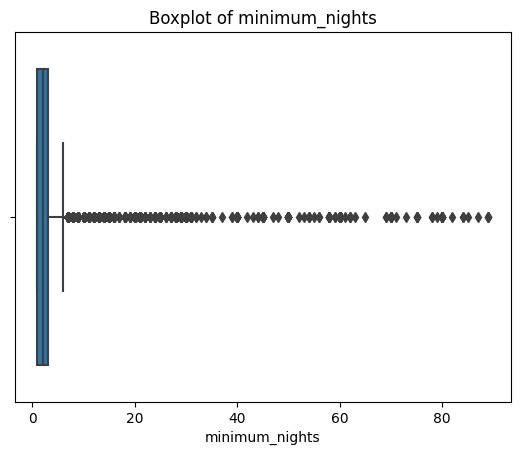

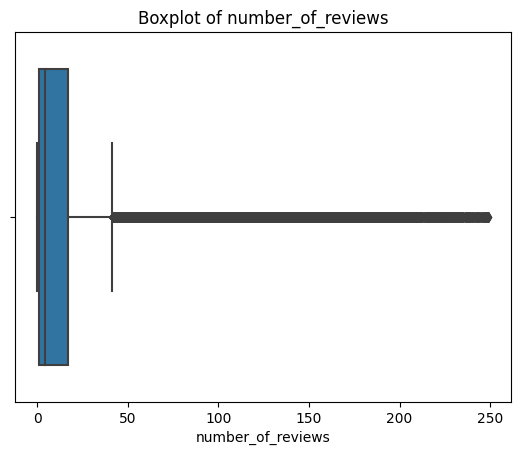

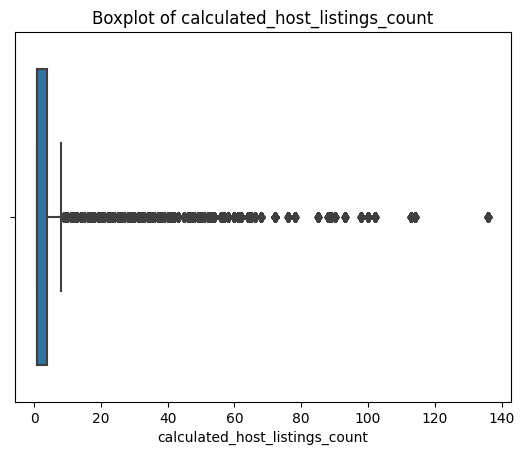

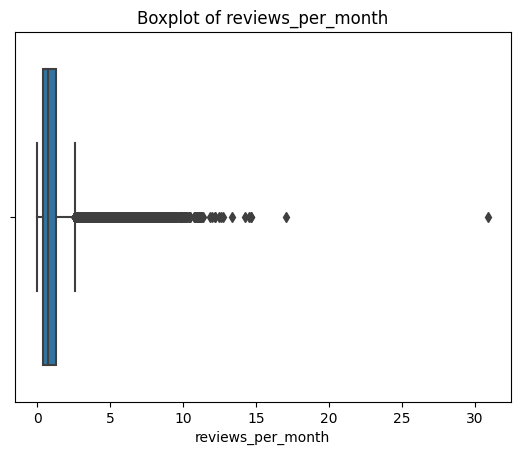

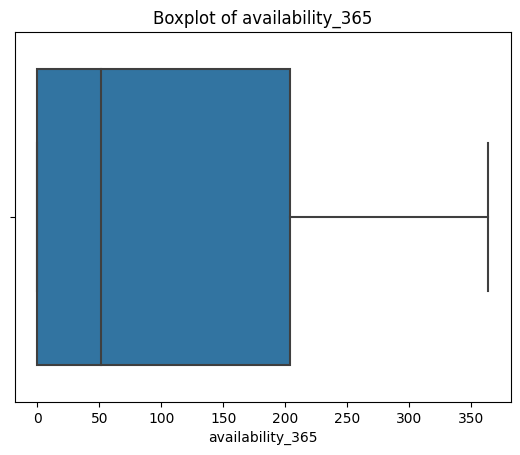

In [ ]:
columns_to_check = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month', 'availability_365',]
# Creating boxplots for each column
for column in columns_to_check:
    sns.boxplot(x=listings[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

From the above graphs, we can see an improvement in terms of outliers in most columns after subsetting.

## EDA

### Visualizing Geographical Data

Let's scatter the latitude against longitude.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


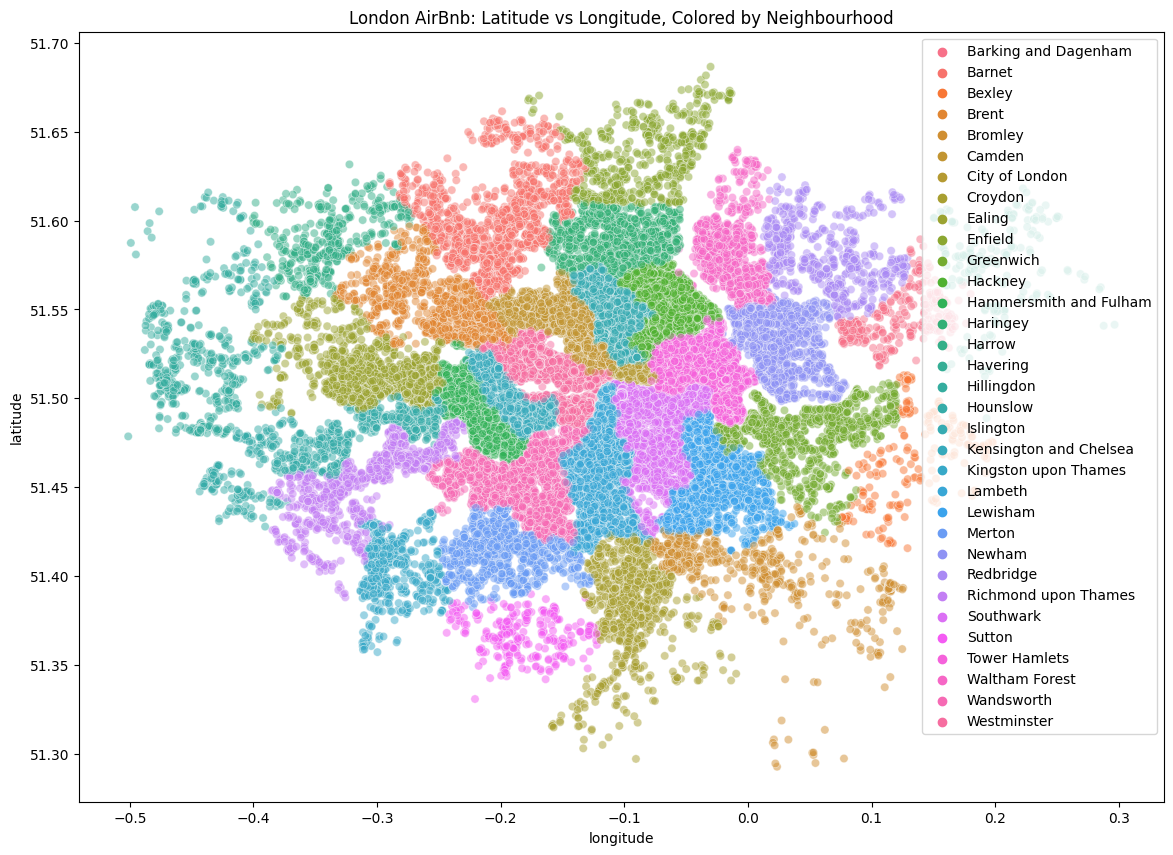

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=listings, x='longitude', y='latitude', hue='neighbourhood',alpha=0.5)
plt.title('London AirBnb: Latitude vs Longitude, Colored by Neighbourhood')
plt.legend(scatterpoints=1)
plt.show()


### Correlation Matrix



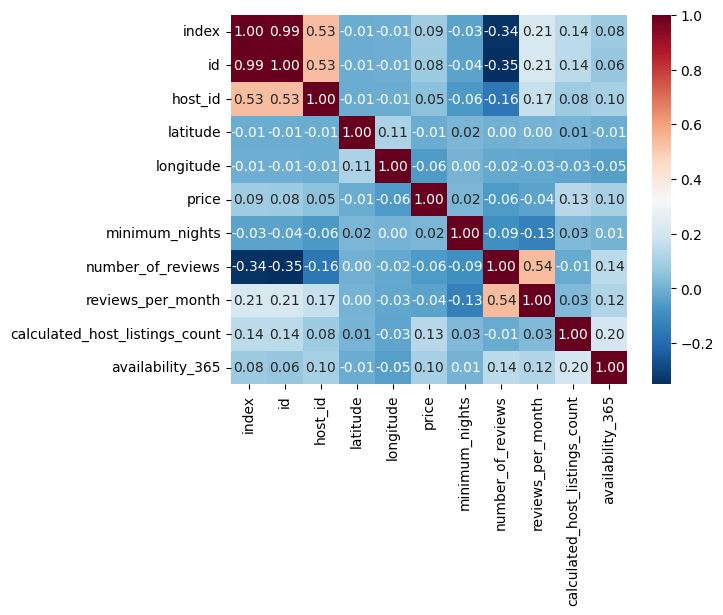

In [ ]:
corr_matrix = listings.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r');
  # annot:place the numbers in the heatmap, fmt:number of decimal, cmap: blue to red with white at 0

We can see that there is a strong correlation between number_of_reviews and reviews_per_month. No other relevant columns seem to show a corrlation among each other.

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78913 entries, 0 to 83849
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           78913 non-null  int64         
 1   id                              78913 non-null  int64         
 2   name                            78913 non-null  object        
 3   host_id                         78913 non-null  int64         
 4   host_name                       78913 non-null  object        
 5   neighbourhood                   78913 non-null  category      
 6   latitude                        78913 non-null  float64       
 7   longitude                       78913 non-null  float64       
 8   room_type                       78913 non-null  object        
 9   price                           78913 non-null  int64         
 10  minimum_nights                  78913 non-null  int64         
 11  nu

### Visualize correlation through pairplots/scatter-matrices

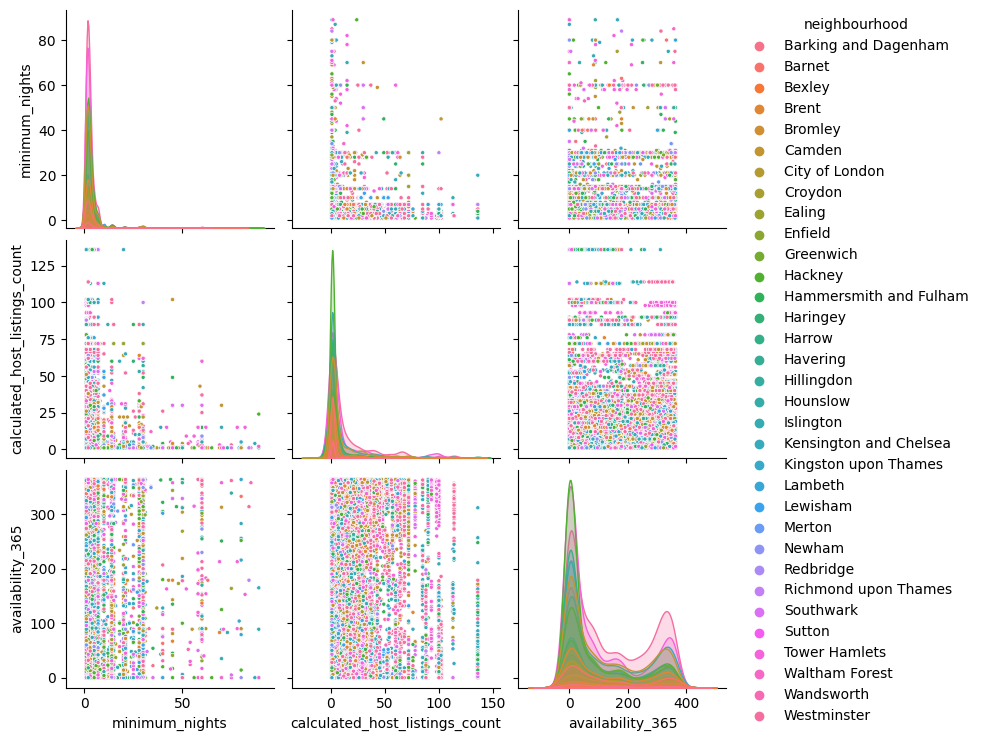

In [ ]:
attributes = ["room_type", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood"]
sns.pairplot(listings[attributes], hue="neighbourhood", markers='.');

We can see that Westminiter and Tower Hamlets have higher number of minimum nights. From previous analysis, they also tuned out to be the most expensive neighbourhoods.

# ML

## Experimenting with Attribute Combinations

In [30]:
listings["reviews_per_listing"] = listings["number_of_reviews"] / listings["calculated_host_listings_count"]
listings["availability_ratio"] =  listings["availability_365"] / 365

## Creating a Test Set

In [32]:
X = listings.drop("price", axis=1)
y = listings["price"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Prepare Data Processing for Machine Learning

### Visualizing the Attribute Combinations

In [33]:
X_train_copy = X_train.copy()  # Making a copy of the training data
y_train_copy = y_train.copy()

# Hypothetical combinations based on Airbnb columns
X_train_copy["reviews_per_listing"] = X_train_copy["number_of_reviews"] / X_train_copy["calculated_host_listings_count"]
X_train_copy["availability_ratio"] =  X_train_copy["availability_365"] / 365

# Viewing the newly created features
X_train_copy[["reviews_per_listing", "availability_ratio"]].head()

reviews_per_listing  availability_ratio
63177              0.00000             0.00000
20774              0.00000             0.00000
51000              6.00000             0.00822
70087              0.44828             0.39726
21957             25.00000             0.01644

## Scaling

## Creating a Cluster Similarity Function

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    # Inherits BaseEstimator to use as a custom scikit-learn estimator, gaining methods like set_params and get_params.
    # Inherits TransformerMixin for compatibility with scikit-learn pipelines and the fit_transform method.
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        # Initializes the custom transformer with default parameters for clustering and RBF kernel.
        self.n_clusters = n_clusters  # Number of clusters to form.
        self.gamma = gamma  # Coefficient for RBF.
        self.random_state = random_state  # Random state for reproducibility.

    def fit(self, X, y=None, sample_weight=None):
        # Fit method to perform k-means clustering on X.
        # Creates a KMeans instance with the specified number of clusters and random state.
        self.kmeans_ = KMeans(self.n_clusters, n_init='auto', random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)  # Fits the KMeans model to the data.
        return self  # Returns self to allow method chaining.

    def transform(self, X):
        # Transform method to calculate the RBF kernel between X and the k-means cluster centers.
        # This method effectively computes the similarity of each sample in X to each cluster center.
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        # Provides output feature names for the transformation, aiding in interpretability.
        # Useful when the transformed data is passed to other estimators or inspected.
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

### Creating a Custom Transformer for Log Transformations to Reduce Impact of Outliers

In [35]:
# Create a custom transformer for log transformation
def log_transform(X):
    X_transformed = X.copy()
    # Select numerical columns for log transformation
    num_cols = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

    # Apply log transformation to selected columns
    X_transformed[num_cols] = np.log1p(X_transformed[num_cols])
    return X_transformed

log_transformer = FunctionTransformer(log_transform)

cluster_simil = ClusterSimilarity(n_clusters=8, gamma=1., random_state=42)

### Defining the Preprocessing Pipelines with the Cluster Similarity Function, Log Transformer and Attribute Combinations

In [36]:
# Define the preprocessing pipeline with log transformation
cat_attribs = ['neighbourhood', 'room_type']
num_attribs = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', "availability_ratio", "reviews_per_listing"]

preprocess_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_attribs),
    ("log_transform", log_transformer, num_attribs),
    ("num", StandardScaler(), num_attribs),
    ("geo", cluster_simil, ['longitude', 'latitude'])
])

preprocess_pipeline

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['neighbourhood', 'room_type']),
                                ('log_transform',
                                 FunctionTransformer(func=<function log_transform at 0x781b81129e10>),
                                 ['minimum_nights', 'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365', 'availability_ratio',
                                  'reviews_per_listing']),
                                ('num', StandardScaler(),
                                 ['minimum_nights', 'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365', 'availability_ratio',
                                  'reviews_per_listing']),
                                ('geo',
                                 ClusterSimilarity(n_clusters=8,
                                                   random_state=42),
                                 ['longitude', 'latitude'])])

### Linear Regression

In [37]:
lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
lin_reg.fit(X_train, y_train)
lr_y_train_predictions = lin_reg.predict(X_train)
# lr_y_pred = lin_reg.predict(X_test)

lr_rmse = mean_squared_error(y_train, lr_y_train_predictions, squared=False)
# lr_mse = mean_squared_error(y_train, lr_y_train_predictions)
# lr_rmse = np.sqrt(lr_mse)
# #print(f"The training data RMSE is {lin_rmse:.0f} or about {(lin_rmse/y_train.mean()*100):.0f}% error")

#lr_rmse = np.sqrt(lr_mse)
# lr_r2 = r2_score(y_test, lr_y_pred)
#print(f"R-squared: {lr_r2}")

# Print metrics for Linear Regression
print(f'RMSE for Linear Regression: {lr_rmse}')

RMSE for Linear Regression: 219.13215115163297


Linear Regression Cros Val

In [38]:
# from sklearn.model_selection import cross_val_score

# # First for the linear regression
# lin_cv_rmses = -cross_val_score(lin_reg, X_train, y_train,
#                               scoring="neg_root_mean_squared_error", cv=3)
# print(f"Average Linear Regression Cross-Validation RMSE: {lin_cv_rmses.mean():.0f}")

### Ridge Pipeline

In [39]:
# Define the full pipeline with the regression model (using Ridge as an example)
ridge_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('regression', Ridge(alpha=1.0))
])

# Train the Ridge model using the training set
ridge_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_ridge = ridge_pipeline.predict(X_train)

# Evaluate the Ridge model with log transformation
rmse_ridge_log = mean_squared_error(y_train, y_pred_ridge, squared=False)
# mse_ridge_log = mean_squared_error(y_train, y_pred_ridge)
# rmse_ridge_log = np.sqrt(mse_ridge_log)
# r2_ridge_log = r2_score(y_test, y_pred_ridge)

# Print metrics for Ridge with log transformation
# print(f'MSE for Ridge with Log Transformation: {mse_ridge_log}')
print(f'RMSE for Ridge with Log Transformation: {rmse_ridge_log}')
# print(f'R-squared (R2) Score for Ridge with Log Transformation: {r2_ridge_log}')

RMSE for Ridge with Log Transformation: 219.25509362668134


### Lasso Pipeline

In [40]:
lasso_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('regression', Lasso(alpha=1.0))
])

# Train the Lasso model using the training set
lasso_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lasso = lasso_pipeline.predict(X_train)

# Calculate error metrics for Lasso
rmse_lasso = mean_squared_error(y_train, y_pred_lasso, squared=False)
#mse_lasso = mean_squared_error(y_train, y_pred_lasso)
# rmse_lasso = np.sqrt(mse_lasso)
# r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the R2 score for Lasso
# print(f'MSE for Lasso: {mse_lasso}')
print(f'RMSE for Lasso: {rmse_lasso}')
# print(f'R-squared (R2) Score for Lasso: {r2_lasso}')

RMSE for Lasso: 219.95987900401428


**Summary:** Out of the 3, Linear Regression has the lowest RMSE, followed by Ridge and then Lasso. Linear Regression had the highest R2, followed by Ridge and then Lasso.

### KNN Regressor

In [41]:
# Define the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
# Combine the preprocessing pipeline with the KNN regressor
full_pipeline = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("regressor", knn_regressor),
])

# Train the entire pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = full_pipeline.predict(X_train)

# Evaluate the performance of the model
rmse_knn = mean_squared_error(y_train, knn_y_pred, squared=False)
# knn_mse = mean_squared_error(y_test, knn_y_pred)
# knn_rmse = np.sqrt(knn_mse)
# knn_r2 = r2_score(y_test, knn_y_pred)

# print(f"Mean Squared Error (MSE): {knn_mse:.4f}")
print(f"Root Mean Squared Error on the test set: {rmse_knn}")
# print((f"R2 Score: {knn_r2}"))

Root Mean Squared Error on the test set: 173.7070142293816


**Summary:** KNN Regressor performed marginally better than Linear Regression/Ridge/Lasso in terms of both a lower RMSE and a higher R2 Score.

### Random Forest

In [42]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf= 1, max_depth=11, min_samples_split=5, random_state=25)

rf_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('model', RandomForestRegressor())
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

rf_predictions = rf_pipeline.predict(X_train)

# Evaluate model performance
rmse_rf = mean_squared_error(y_train, rf_predictions, squared=False)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_rmse = np.sqrt(rf_mse)
# rf_r2 = r2_score(y_test, rf_predictions)


# print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error: {rmse_rf}")
# print(f"R^2 Score: {rf_r2:.4f}")

Root Mean Squared Error: 76.07950066069806


In [43]:
rf_r2 = r2_score(y_train, rf_predictions)
print(f"R^2 Score: {rf_r2:.4f}")

R^2 Score: 0.8930


**Summary:** Random Forest appeared to perform marginally better than both Linear/Ridge/Lasso and KNN

### XGB Regressor

In [44]:
model_xg = XGBRegressor(n_estimators=100,
                         max_leaves=16,
                         learning_rate=0.1,
                         objective='reg:squarederror') # learning a binary classifier, produce probability as score

xgb_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('model', model_xg)
])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

xgb_predictions = xgb_pipeline.predict(X_train)

# Evaluate model performance
rmse_xgb = mean_squared_error(y_train, xgb_predictions, squared=False)
# xgb_mse = mean_squared_error(y_test, xgb_predictions)
# xgb_r2 = r2_score(y_test, xgb_predictions)
# xgb_rmse = np.sqrt(xgb_mse)

# print(f"Mean Squared Error on the test set: {xgb_rmse}")
print(f"Root Mean Squared Error on the test set: {rmse_xgb}")
# print(f"R^2 Score: {xgb_r2:.4f}")

Root Mean Squared Error on the test set: 176.61001844878558


In [ ]:
# # Perform cross-validation
# cv = KFold(n_splits=10, shuffle=True, random_state=42)  # Adjust the number of folds as needed
# cv_scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# # Convert the scores to positive since scikit-learn returns negative MSE
# cv_rmse_scores = np.sqrt(-cv_scores)
# # Print the cross-validation scores
# print("Cross-Validation RMSE Scores:", cv_rmse_scores)
# print("Mean RMSE:", np.mean(cv_rmse_scores))

**Summary:** The XGB Regressor performed the best in terms of both a lower RMSE and higher R2.

### SVM

In [45]:
def create_geohash(row):
    return gh.encode(row['latitude'], row['longitude'], precision=4)
listings['geohash'] = listings.apply(create_geohash, axis=1)
print(listings[['latitude', 'longitude', 'geohash']])

       latitude  longitude geohash
0      51.56802   -0.11121    gcpv
1      51.48796   -0.16898    gcpu
2      51.52098   -0.14002    gcpv
3      51.47298   -0.16376    gcpu
4      51.44687   -0.21874    gcpu
...         ...        ...     ...
83845  51.53057   -0.18423    gcpv
83846  51.52301   -0.08979    gcpv
83847  51.52301   -0.08979    gcpv
83848  51.52301   -0.08979    gcpv
83849  51.51050   -0.01788    gcpv

[83850 rows x 3 columns]


In [46]:
# Choose your SVM kernel and set up the model
svm_model = SVR(kernel='rbf', C=1000, gamma=0.001)

# Create the final pipeline
full_pipeline = Pipeline([
    ('preparation', preprocess_pipeline),
    ('svm_model', svm_model)
])

# Display the pipeline
full_pipeline

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['neighbourhood',
                                                   'room_type']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x781b81129e10>),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'availability_ratio',
                                                   'reviews_per_listing']),
                                                 ('num', StandardScaler(),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'availability_ratio',
                                                   'reviews_per_listing']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=8,
                                                                    random_state=42),
                                                  ['longitude', 'latitude'])])),
                ('svm_model', SVR(C=1000, gamma=0.001))])

In [47]:
# Train the model
full_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = full_pipeline.predict(X_train)

rmse_svm = mean_squared_error(y_train, y_pred_svm, squared=False)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# mae = mean_absolute_error(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse_svm}")
# print(f"R2 Score: {r2}")
# print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
# print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 222.77351277218816


**Summary:** SVM has the lowest R2 score compared to all other models, but the highest RMSE, so this appears to be the worst performing model.

### Hyperparameter Tuning: Randomized Search

#### XGB

In [48]:
# Create the XGBoostRegressor model
model_xg = XGBRegressor(n_estimators=100,
                         max_leaves=16,
                         learning_rate=0.1,
                         objective='reg:squarederror')

# Create the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('model', model_xg)
])

# Define the parameter distribution for RandomizedSearchCV
#param_distributions = {
 #   'model__n_estimators': randint(50, 300),
  #  'model__max_depth': randint(3, 10),
   # 'model__learning_rate': randint(1, 20),  # You can adjust the range
    #'model__subsample': [0.8, 0.9, 1.0],  # Convert to float in the range [0.8, 1.0]
    #'model__colsample_bytree': [0.8, 0.9, 1.0],
    #'model__reg_alpha': [0, 0.1, 0.5, 1.0],
    #'model__reg_lambda': [0, 0.1, 0.5, 1.0]
#}

param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.5),  # Generating float values between 0.01 and 0.51
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5, 1.0],
    'model__reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Create the RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=5,       # Adjust the number of cross-validation folds as needed
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
xgb_random_search.fit(X_train, y_train)

# Get the best estimator from the search
xgb_best_model = xgb_random_search.best_estimator_

# Make predictions on the test set using the best model
xgb_best_predictions = xgb_best_model.predict(X_train)

# Evaluate the best model's performance
xgb_best_mse = mean_squared_error(y_train, xgb_best_predictions)
xgb_best_rmse = np.sqrt(xgb_best_mse)
xgb_best_r2 = r2_score(y_train, xgb_best_predictions)

print(f"Best Mean Squared Error on the test set: {xgb_best_mse}")
print(f"Best Root Mean Squared Error on the test set: {xgb_best_rmse}")
print(f"Best R^2 Score: {xgb_best_r2:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Mean Squared Error on the test set: 27230.490332696372
Best Root Mean Squared Error on the test set: 165.0166365330974
Best R^2 Score: 0.4967


In [ ]:
# # Perform cross-validation
# cv = KFold(n_splits=10, shuffle=True, random_state=42)  # Adjust the number of folds as needed
# cv_scores = cross_val_score(xgb_random_search, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# # Convert the scores to positive since scikit-learn returns negative MSE
# cv_rmse_scores = np.sqrt(-cv_scores)
# # Print the cross-validation scores
# print("Cross-Validation RMSE Scores:", cv_rmse_scores)
# print("Mean RMSE:", np.mean(cv_rmse_scores))

The R2 decreased and the RMSE increased, so hyperparameter tuning didn't actually improve the model's performance.

#### Random Forest

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

model = RandomForestRegressor(n_estimators=100, min_samples_leaf= 1, random_state=25)

# Define the Random forest and its hyperparameters
param_distribs = {
    'model__max_depth': randint(1, 20),  # Random integer values between 1 and 20 for max_depth
    'model__min_samples_split': randint(2, 20),  # Random integer values between 2 and 20 for min_samples_split
    # Add more hyperparameters as needed for tuning
}

# Assuming preprocess_pipeline is defined and X_train, y_train are available

# Create a Pipeline including preprocessing and DecisionTreeRegressor model
rf2_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('model', RandomForestRegressor())  # The 'model' refers to the DecisionTreeRegressor instance
])

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf2_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
                                   scoring='neg_root_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best estimator from the search
best_estimator = random_search.best_estimator_

# Get the results of cross-validation
random_cv_res = pd.DataFrame(random_search.cv_results_)

# Display top results based on mean_test_score
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res[['param_model__max_depth', 'param_model__min_samples_split', 'mean_test_score']].head()


param_model__max_depth param_model__min_samples_split  mean_test_score
4                      8                              4       -205.42172
3                     11                              5       -205.46459
8                     12                             18       -205.89268
1                     11                              9       -206.20457
9                     10                             17       -206.49758

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_leaf= 1, max_depth=12, min_samples_split=18, random_state=25)

rf_pipeline = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('model', model)
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

rf_predictions = rf_pipeline.predict(X_train)

# Evaluate model performance
rf_mse = mean_squared_error(y_train, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_train, rf_predictions)


print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R^2 Score: {rf_r2:.4f}")

Mean Squared Error (MSE): 25545.8837
Root Mean Squared Error: 159.83079709547815
R^2 Score: 0.5278


In [ ]:
# # Perform cross-validation
# cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of folds as needed
# cv_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
# # Convert the scores to positive since scikit-learn returns negative MSE
# cv_rmse_scores = np.sqrt(-cv_scores)
# # Print the cross-validation scores
# print("Cross-Validation RMSE Scores:", cv_rmse_scores)
# print("Mean RMSE:", np.mean(cv_rmse_scores))

#### Knn

In [ ]:
# Define the hyperparameter distributions
param_dist = {
    'regressor__n_neighbors': randint(1, 8),
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2],
}

# Define the KNN regressor
knn_regressor = KNeighborsRegressor()

# Combine the preprocessing pipeline with the KNN regressor
full_pipeline_knn = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("regressor", knn_regressor),
])

# Create the HalvingRandomSearchCV object
halving_random_search = HalvingRandomSearchCV(
    full_pipeline_knn, param_distributions=param_dist, factor=2, resource='n_samples',
    max_resources='auto', aggressive_elimination=True, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42,error_score='raise'
)

# Train the entire pipeline on the training data using HalvingRandomSearchCV
halving_random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_halving_random = halving_random_search.best_params_
print("Best Hyperparameters (Halving Randomized Search):", best_params_halving_random)

# Get the best model from the halving randomized search
best_model_halving_random = halving_random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_halving_random = best_model_halving_random.predict(X_train)

# Evaluate the performance of the best model
mse_best_halving_random = mean_squared_error(y_train, y_pred_best_halving_random)
rmse_best_halving_random = np.sqrt(mse_best_halving_random)
r2_best_halving_random = r2_score(y_test, y_pred_best_halving_random)

print(f"Root Mean Squared Error with Best Model (Halving Randomized Search): {rmse_best_halving_random:.3f}")
print(f"R-squared with Best Model (Halving Randomized Search): {r2_best_halving_random:.3f}")

# Bagging or Boosting

## Pickle or JobLib to Conclude

### Extra: Hyperparameter Tuning for Knn with Random Search

In [ ]:
# Define the hyperparameter distributions
param_dist = {
    'regressor__n_neighbors': randint(1, 20),  # Adjust the range based on your preferences
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNN regressor
knn_regressor = KNeighborsRegressor()

# Combine the preprocessing pipeline with the KNN regressor
full_pipeline_knn = Pipeline([
    ("preprocess", preprocess_pipeline),
    ("regressor", knn_regressor),
])

# Create the randomized search object
random_search = RandomizedSearchCV(full_pipeline_knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_random)

# Get the best model from the randomized search
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random = best_model_random.predict(X_test)

# Evaluate the performance of the best model
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
rmse_best_random = np.sqrt(mse_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print(f"Root Mean Squared Error with Best Model (Randomized Search): {rmse_best_random:.3f}")
print(f"R-squared with Best Model (Randomized Search): {r2_best_random:.3f}")
